# Timescales

Test script, to be integrated in main pipeline

In [74]:
import os
os.chdir("/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/bin")

import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns
import sys
import json
import glob
from lib import utils

sys.path.append(os.getcwd()) 
sns.set(style='whitegrid')
from lib.dataset_utils import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

from lib.plot_utils import read_loss_file,prepare_df_for_plotting, get_summary_lambdas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## SIMULATED

In [75]:
result_json = glob.glob(f"../results_timescales_replicates/**/federated_training/**/**/**/results.json", recursive=True)
result_json = list(set(result_json))
result_json

['../results_timescales_replicates/timescales/federated_training/FedODE/20_rounds/rep_2-alpha_1.0-lr_0.001-batchsize_32_clipping_False_lrdecay_1.0_localepochs_10_decayonset_15_alpha_1.0/federated_outputs/results.json',
 '../results_timescales_replicates/timescales/federated_training/FedODE/20_rounds/rep_3-alpha_0.0-lr_0.001-batchsize_32_clipping_False_lrdecay_1.0_localepochs_10_decayonset_15_alpha_0.0/federated_outputs/results.json',
 '../results_timescales_replicates/timescales/federated_training/FedODE/20_rounds/rep_1-alpha_0.5-lr_0.001-batchsize_32_clipping_False_lrdecay_1.0_localepochs_10_decayonset_15_alpha_0.5/federated_outputs/results.json',
 '../results_timescales_replicates/timescales/federated_training/FedODE/20_rounds/rep_3-alpha_0.5-lr_0.001-batchsize_32_clipping_False_lrdecay_1.0_localepochs_10_decayonset_15_alpha_0.5/federated_outputs/results.json',
 '../results_timescales_replicates/timescales/federated_training/FedODE/20_rounds/rep_2-alpha_0.5-lr_0.001-batchsize_32_clip

In [76]:
df_centralized_evaluate = pd.DataFrame()
df_federated_evaluate = pd.DataFrame()
df_aggregation = pd.DataFrame()
for file in result_json:
    df_centralized_evaluate_temp, df_federated_evaluate_temp, df_aggregation_temp = read_loss_file(file)
    df_centralized_evaluate = pd.concat([df_centralized_evaluate, df_centralized_evaluate_temp])
    df_federated_evaluate = pd.concat([df_federated_evaluate, df_federated_evaluate_temp])
    df_aggregation = pd.concat([df_aggregation, df_aggregation_temp])
df = pd.concat([df_centralized_evaluate, df_federated_evaluate])
df_aggregation["dataset_name"] = "_"
df_summary_lambdas = get_summary_lambdas(df_aggregation)

/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/bin/lib/plot_utils.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary_aggregation["client_1"] = df_summary_aggregation['clients'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/bin/lib/plot_utils.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/luisa/Desktop/nygc/cluster/projects/fl4tsf/bin/lib/plot_utils.py:261: SettingWithCopyWarning: 
A value is trying to b

<Figure size 1000x300 with 0 Axes>

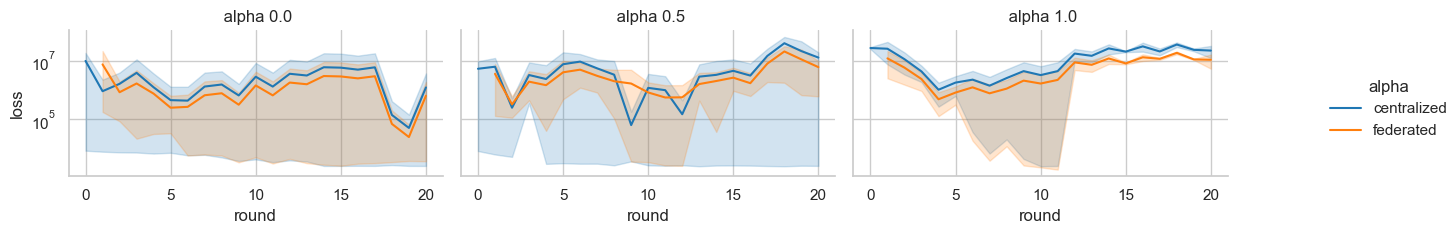

In [77]:
loss_df = df[df['type'].isin(["centralized", "federated"])]


# fig size
plt.figure(figsize=(10, 3))
# Create FacetGrid
g = sns.FacetGrid(
    loss_df,
    col="alpha",
    height=2.5,
    aspect=1.5,  # Width = height * aspect
    sharey=True
)

# Map the lineplot onto the grid
g.map_dataframe(
    sns.lineplot,
    x='round',
    y='loss',
    hue='type',
    palette='tab10'
)

# Adjustments
g.set_axis_labels("round", "loss")
g.set_titles(" alpha {col_name}")
#g.set(ylim=(0, None))

# Move legend outside
g.add_legend(title ="alpha")
g._legend.set_bbox_to_anchor((1.05, 0.5))
# legend 
g._legend.set_loc("center left")
# title
# y axis log

plt.yscale('log')

plt.tight_layout()
plt.show()


In [78]:
loss_df

,round,loss,centralized_accuracy,lr,batch_size,clipping,lrdecay,localepochs,decay_onset,dataset_name,alpha,replicate,aggregation,hyperparameters,type,federated_evaluate_accuracy
0,0,2.937932e+07,6033.049805,0.001,32,False,1.0,10,15,timescales,1.0,2,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
1,1,4.403362e+07,8958.189779,0.001,32,False,1.0,10,15,timescales,1.0,2,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
2,2,3.391086e+06,761.722758,0.001,32,False,1.0,10,15,timescales,1.0,2,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
3,3,1.881642e+06,403.835531,0.001,32,False,1.0,10,15,timescales,1.0,2,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
4,4,1.788716e+06,397.730469,0.001,32,False,1.0,10,15,timescales,1.0,2,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",centralized,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,16,3.093909e+03,NaN,0.001,32,False,1.0,10,15,timescales,0.0,2,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",federated,0.627443
16,17,3.233060e+03,NaN,0.001,32,False,1.0,10,15,timescales,0.0,2,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",federated,0.650246
17,18,4.278027e+03,NaN,0.001,32,False,1.0,10,15,timescales,0.0,2,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",federated,0.858290
18,19,4.214982e+03,NaN,0.001,32,False,1.0,10,15,timescales,0.0,2,FedODE,"lr: 0.001, batch_size: 32, clipping: False, lr...",federated,0.848732


/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_92703/2809241769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df['alpha'] = loss_df['alpha'].astype(str)
/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_92703/2809241769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_df['alpha'] = loss_df['alpha'].replace({'0.0': '0.0  (FedODE)', '0.5': '0.5  (mix)', '1.0': '1.0 (FedAvg)'})
/var/folders/yx/rfhrpk093hz1gfwtn7qxt_180000gq/T/ipykernel_92703/2809241769.py:8: SettingWithC

<Figure size 1300x1000 with 0 Axes>

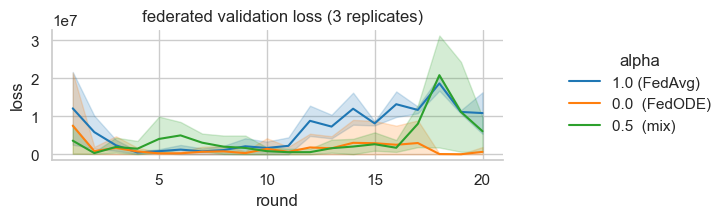

In [85]:
loss_df = df[df['type'].isin([ "federated"])]

# add to leged is alpha is 0.0 fedODE 
loss_df['alpha'] = loss_df['alpha'].astype(str)
loss_df['alpha'] = loss_df['alpha'].replace({'0.0': '0.0  (FedODE)', '0.5': '0.5  (mix)', '1.0': '1.0 (FedAvg)'})

# round is an integer
loss_df['round'] = loss_df['round'].astype(int)
# fig size
plt.figure(figsize=(13, 10))
# Create FacetGrid
g = sns.FacetGrid(
    loss_df,
    col="type",
    height=2.5,
    aspect=1.5,  # Width = height * aspect
    sharey=True
)

# Map the lineplot onto the grid
g.map_dataframe(
    sns.lineplot,
    x='round',
    y='loss',
    hue='alpha',
    palette='tab10'
)

# Adjustments
g.set_axis_labels("round", "loss")
g.set_titles("  {col_name} validation loss (3 replicates)")
#g.set(ylim=(0, None))

#  x axis as integer every 5 of rounds
g.set(xticks=np.arange(5, loss_df['round'].max() + 1, 5))


# Move legend outside
g.add_legend(title ="alpha")
g._legend.set_bbox_to_anchor((1.05, 0.5))
# legend 
g._legend.set_loc("center left")
# title
# y axis log

plt.tight_layout()
plt.show()

<Figure size 1300x1000 with 0 Axes>

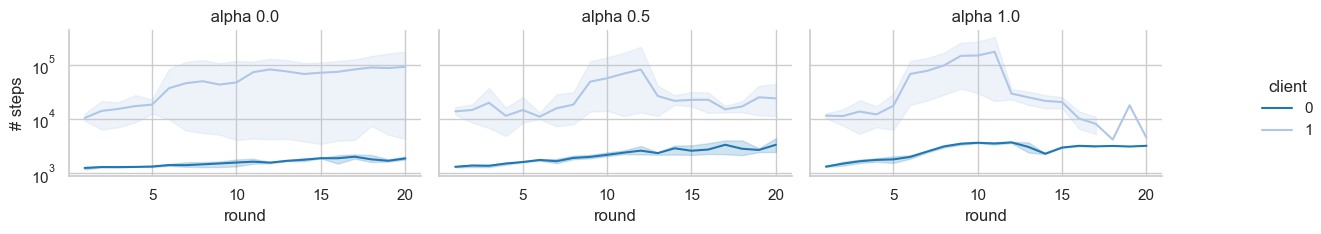

In [97]:

# fig size
plt.figure(figsize=(13, 10))
# Create FacetGrid
g = sns.FacetGrid(
    df_summary_lambdas,
    col="alpha",
    height=2.5,
    aspect=1.5,  # Width = height * aspect
    sharey=True
)

# Map the lineplot onto the grid
g.map_dataframe(
    sns.lineplot,
    x='round',
    y='steps',
    hue='client',
    palette='tab20'
)

# Adjustments
g.set_axis_labels("round", "# steps")
g.set_titles(" alpha {col_name} ")

#  x axis as integer every 5 of rounds
g.set(xticks=np.arange(5, loss_df['round'].max() + 1, 5))


# Move legend outside
g.add_legend(title ="client")
g._legend.set_bbox_to_anchor((1.05, 0.5))
# legend 
g._legend.set_loc("center left")
# title
# y axis log
plt.yscale('log')

plt.tight_layout()
plt.show()

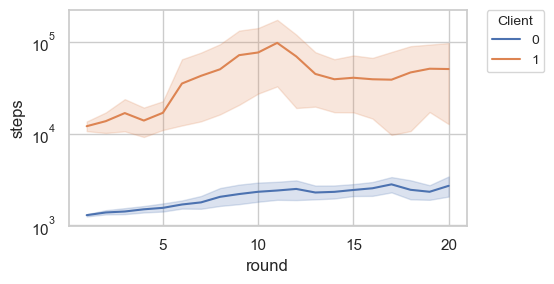

In [80]:
######################################
#  Plot the last loss vs difference
#######################################
plt.figure(figsize=(6, 3))
#df_summary_lambdas = df_summary_lambdas[df_summary_lambdas["alpha"]== 0.0]
sns.lineplot(data=df_summary_lambdas, x='round', y='steps',
             hue='client',  markers=True, dashes=False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0., title='Client', fontsize='small', title_fontsize='small')

plt.tight_layout()
# make y axis log scale
plt.yscale('log')
plt.show()